In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import matplotlib.font_manager as fm
font_name = fm.FontProperties(fname = "C:\\Windows\\Fonts\\malgun.ttf").get_name()
plt.rc("font", family=font_name)

# 음수지원
import matplotlib as mlp
mlp.rcParams["axes.unicode_minus"] = False

# 주제 : 서울시 구별 범죄 현황() 분석

#### CCTV와 범죄, 검거율에 관계가 있는가?
#### 강남 3구는 과연 범죄 발생률이 낮고 검거율이 높은가?
#### 우리 동네는 어떤가?

# 1. Data Definition

- 데이터 출처 : hhttps://www.data.go.kr/data/15054738/fileData.do
- 2000년 ~ 2021년 간, 경찰서별 5대범죄 발생 검거 현황

In [146]:
crime_anal_police = pd.read_csv("data/crime2.csv", encoding = "euc-kr")
crime_anal_police.head()

,구분,살인발생,살인검거,강도발생,강도검거,강간발생,강간검거,절도발생,절도검거,폭력발생,폭력검거
0,중부,4,4,3,3,109,57,765,426,945,801
1,종로,3,0,2,2,88,59,513,234,815,663
2,남대문,2,2,3,3,52,40,514,313,464,423
3,서대문,3,3,2,2,137,120,1027,562,1109,907
4,혜화,3,3,2,2,68,43,566,270,652,525


In [147]:
crime_anal_police.rename(columns={'구분':'관서명'}, inplace=True)

In [148]:
crime_anal_police.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31 entries, 0 to 30
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   관서명     31 non-null     object
 1   살인발생    31 non-null     int64 
 2   살인검거    31 non-null     int64 
 3   강도발생    31 non-null     int64 
 4   강도검거    31 non-null     int64 
 5   강간발생    31 non-null     int64 
 6   강간검거    31 non-null     int64 
 7   절도발생    31 non-null     int64 
 8   절도검거    31 non-null     int64 
 9   폭력발생    31 non-null     int64 
 10  폭력검거    31 non-null     int64 
dtypes: int64(10), object(1)
memory usage: 2.8+ KB


# 2. EDA & Data Preprocessing

## (1) 관서명을 구 이름으로 변경

### 1) 관서명을 공식적 관서명으로 변경

In [82]:
station_names = []

for name in crime_anal_police["관서명"]:
    station_names.append("서울" + name + "경찰서") 
    
print(station_names)

['서울중부경찰서', '서울종로경찰서', '서울남대문경찰서', '서울서대문경찰서', '서울혜화경찰서', '서울용산경찰서', '서울성북경찰서', '서울동대문경찰서', '서울마포경찰서', '서울영등포경찰서', '서울성동경찰서', '서울동작경찰서', '서울광진경찰서', '서울서부경찰서', '서울강북경찰서', '서울금천경찰서', '서울중랑경찰서', '서울강남경찰서', '서울관악경찰서', '서울강서경찰서', '서울강동경찰서', '서울종암경찰서', '서울구로경찰서', '서울서초경찰서', '서울양천경찰서', '서울송파경찰서', '서울노원경찰서', '서울방배경찰서', '서울은평경찰서', '서울도봉경찰서', '서울수서경찰서']


### 2) 경찰서 주소와 위도, 경도 값을 받아오기(Kakao API 이용)¶

In [47]:
import requests


station_address = []
station_lat = []
station_lng = []

header = {"Authorization" : "KakaoAK a9a2f4fea117ce669de392b3186bade7" }  

# 경찰서 이름 하나하나 카카오에 보낼 것
for name in station_names:
    url = "https://dapi.kakao.com/v2/local/search/keyword.json?query={}".format(name)
    place = requests.get(url, headers = header).json()["documents"]
    
#     print(place[0]["address_name"])
#     print(place[0]["x"])
#     print(place[0].get["y"])
# get 굳이 쓰면 좋은 점 : y값 없을 경우 디폴트값을 지정할 수 있음(대체가능)
# # print 로 확인 후
    station_address.append(place[0]["address_name"])
    station_lng.append(place[0]["x"])
    station_lat.append(place[0].get("y"))
    
    print(name + "----->" + place[0].get("address_name"))

서울중부경찰서----->서울 중구 저동2가 62-1
서울종로경찰서----->서울 종로구 공평동 1
서울남대문경찰서----->서울 중구 남대문로5가 561
서울서대문경찰서----->서울 서대문구 미근동 165
서울혜화경찰서----->서울 종로구 인의동 48-57
서울용산경찰서----->서울 용산구 원효로1가 12-12
서울성북경찰서----->서울 성북구 삼선동5가 301
서울동대문경찰서----->서울 동대문구 청량리동 229
서울마포경찰서----->서울 마포구 아현동 618-1
서울영등포경찰서----->서울 영등포구 당산동3가 2-11
서울성동경찰서----->서울 성동구 행당동 192-8
서울동작경찰서----->서울 동작구 노량진동 72-35
서울광진경찰서----->서울 광진구 구의동 254-32
서울서부경찰서----->서울 은평구 녹번동 177-15
서울강북경찰서----->서울 강북구 번동 415-15
서울금천경찰서----->서울 금천구 시흥동 1030
서울중랑경찰서----->서울 중랑구 신내동 810
서울강남경찰서----->서울 강남구 대치동 998
서울관악경찰서----->서울 관악구 봉천동 1695-5
서울강서경찰서----->서울 강서구 화곡동 980-27
서울강동경찰서----->서울 강동구 성내동 541-1
서울종암경찰서----->서울 성북구 하월곡동 27-5
서울구로경찰서----->서울 구로구 구로동 3-25
서울서초경찰서----->서울 서초구 서초동 1726-1
서울양천경찰서----->서울 양천구 신정동 321
서울송파경찰서----->서울 송파구 가락동 9
서울노원경찰서----->서울 노원구 하계동 250
서울방배경찰서----->서울 서초구 방배동 455-10
서울은평경찰서----->서울 은평구 불광동 산 24
서울도봉경찰서----->서울 도봉구 창동 17
서울수서경찰서----->서울 강남구 개포동 14


### 3) 구별, 위도, 경도 데이터를 원본 데이터에 병합

#### 구별, 위도, 경도 데이터프레임 만들기

In [83]:
df = pd.DataFrame([station_address, station_lat, station_lng]).T
df.columns=["구별", "위도", "경도"]


# 주소에서 구이름 추출
df["구별"] = df["구별"].str.split(" ").str[1]

In [84]:
df.head()

,구별,위도,경도
0,중구,37.56361812722828,126.98958691395208
1,종로구,37.57185082446809,126.98417036713045
2,중구,37.55477683026614,126.97349503706043
3,서대문구,37.5649023404956,126.966790740735
4,종로구,37.5718915247338,126.998935936567


In [149]:
crime_anal_police["구별"] = df["구별"]
crime_anal_police["위도"] = df["위도"]
crime_anal_police["경도"] = df["경도"]

crime_anal_police.head()

,관서명,살인발생,살인검거,강도발생,강도검거,강간발생,강간검거,절도발생,절도검거,폭력발생,폭력검거,구별,위도,경도
0,중부,4,4,3,3,109,57,765,426,945,801,중구,37.56361812722828,126.98958691395208
1,종로,3,0,2,2,88,59,513,234,815,663,종로구,37.57185082446809,126.98417036713045
2,남대문,2,2,3,3,52,40,514,313,464,423,중구,37.55477683026614,126.97349503706043
3,서대문,3,3,2,2,137,120,1027,562,1109,907,서대문구,37.5649023404956,126.966790740735
4,혜화,3,3,2,2,68,43,566,270,652,525,종로구,37.5718915247338,126.998935936567


# +) Checkpoint

In [150]:
crime_anal_police.to_csv("data/crime_anal_poice_include_gu.csv", encoding="utf-8")

In [151]:
crime_anal = pd.read_csv("data/crime_anal_poice_include_gu.csv", encoding="utf-8")
crime_anal.head()

,Unnamed: 0,관서명,살인발생,살인검거,강도발생,강도검거,강간발생,강간검거,절도발생,절도검거,폭력발생,폭력검거,구별,위도,경도
0,0,중부,4,4,3,3,109,57,765,426,945,801,중구,37.563618,126.989587
1,1,종로,3,0,2,2,88,59,513,234,815,663,종로구,37.571851,126.984170
2,2,남대문,2,2,3,3,52,40,514,313,464,423,중구,37.554777,126.973495
3,3,서대문,3,3,2,2,137,120,1027,562,1109,907,서대문구,37.564902,126.966791
4,4,혜화,3,3,2,2,68,43,566,270,652,525,종로구,37.571892,126.998936


In [152]:
del crime_anal["Unnamed: 0"]

## (2) 관서명을 삭제하고 구별을 인덱스로 설정

In [153]:
del crime_anal["관서명"]

In [154]:
crime_anal = crime_anal.set_index("구별")
crime_anal.head()

,살인발생,살인검거,강도발생,강도검거,강간발생,강간검거,절도발생,절도검거,폭력발생,폭력검거,위도,경도
구별,,,,,,,,,,,,
중구,4,4,3,3,109,57,765,426,945,801,37.563618,126.989587
종로구,3,0,2,2,88,59,513,234,815,663,37.571851,126.984170
중구,2,2,3,3,52,40,514,313,464,423,37.554777,126.973495
서대문구,3,3,2,2,137,120,1027,562,1109,907,37.564902,126.966791
종로구,3,3,2,2,68,43,566,270,652,525,37.571892,126.998936


## (3) 각 범죄의 검거율을 파생변수로 추가 & 검거 컬럼 삭제

In [155]:
crime_anal["살인검거율"] = crime_anal["살인검거"]/crime_anal["살인발생"] * 100
crime_anal["강도검거율"] = crime_anal["강도검거"]/crime_anal["강도발생"] * 100
crime_anal["강간검거율"] = crime_anal["강간검거"]/crime_anal["강간발생"] * 100
crime_anal["절도검거율"] = crime_anal["절도검거"]/crime_anal["절도발생"] * 100
crime_anal["폭력검거율"] = crime_anal["폭력검거"]/crime_anal["폭력발생"] * 100

In [156]:
crime_anal = crime_anal.drop(["살인검거","강도검거","강간검거","절도검거","폭력검거"], axis = 1)

In [157]:
crime_anal.info()

# 살인검거율과 강도검거율에 결측치 있음을 확인 할 수 있음

<class 'pandas.core.frame.DataFrame'>
Index: 31 entries, 중구 to 강남구
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   살인발생    31 non-null     int64  
 1   강도발생    31 non-null     int64  
 2   강간발생    31 non-null     int64  
 3   절도발생    31 non-null     int64  
 4   폭력발생    31 non-null     int64  
 5   위도      31 non-null     float64
 6   경도      31 non-null     float64
 7   살인검거율   30 non-null     float64
 8   강도검거율   29 non-null     float64
 9   강간검거율   31 non-null     float64
 10  절도검거율   31 non-null     float64
 11  폭력검거율   31 non-null     float64
dtypes: float64(7), int64(5)
memory usage: 3.1+ KB


#### 살인검거율과 강도검거율에 결측치 있음을 확인 할 수 있음

- 데이터 탐색 결과, 발생이 0일 경우에 분모가 0이 되어 계산이 되지 않았음을 확인 

#### 결측치를 0으로 채워주기

In [158]:
crime_anal = crime_anal.fillna(0)

In [159]:
crime_anal.info()

<class 'pandas.core.frame.DataFrame'>
Index: 31 entries, 중구 to 강남구
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   살인발생    31 non-null     int64  
 1   강도발생    31 non-null     int64  
 2   강간발생    31 non-null     int64  
 3   절도발생    31 non-null     int64  
 4   폭력발생    31 non-null     int64  
 5   위도      31 non-null     float64
 6   경도      31 non-null     float64
 7   살인검거율   31 non-null     float64
 8   강도검거율   31 non-null     float64
 9   강간검거율   31 non-null     float64
 10  절도검거율   31 non-null     float64
 11  폭력검거율   31 non-null     float64
dtypes: float64(7), int64(5)
memory usage: 3.1+ KB


## (4) "발생" 컬럼 정규화

- 살인 발생 건수가 훨씬 적지만 더 큰 범죄라고 고려됨을 반영
- 현재 발생 컬럼 간의 수치 차이가 많이 남

#### 컬럼명 변경

In [160]:
crime_anal.rename(columns={"강도발생":"강도", "강간발생":"강간", "살인발생":"살인"
                          , "절도발생":"절도", "폭력발생":"폭력"}, inplace=True)
crime_anal.head()


,살인,강도,강간,절도,폭력,위도,경도,살인검거율,강도검거율,강간검거율,절도검거율,폭력검거율
구별,,,,,,,,,,,,
중구,4,3,109,765,945,37.563618,126.989587,100.0,100.0,52.293578,55.686275,84.761905
종로구,3,2,88,513,815,37.571851,126.984170,0.0,100.0,67.045455,45.614035,81.349693
중구,2,3,52,514,464,37.554777,126.973495,100.0,100.0,76.923077,60.894942,91.163793
서대문구,3,2,137,1027,1109,37.564902,126.966791,100.0,100.0,87.591241,54.722493,81.785392
종로구,3,2,68,566,652,37.571892,126.998936,100.0,100.0,63.235294,47.703180,80.521472


#### 정규화

In [161]:
from sklearn import preprocessing

In [162]:
min_max_scaler = preprocessing.MinMaxScaler()
# standardscaler : 표준화
# minmaxscale : 정규화 

X = crime_anal[["폭력", "살인","강도","강간","절도"]].values

X_scaled = min_max_scaler.fit_transform(X)
X_scaled

array([[0.28939828, 0.44444444, 0.23076923, 0.17783505, 0.264173  ],
       [0.22731614, 0.33333333, 0.15384615, 0.12371134, 0.11689071],
       [0.05969436, 0.22222222, 0.23076923, 0.03092784, 0.11747516],
       [0.36771729, 0.33333333, 0.15384615, 0.25      , 0.41729982],
       [0.14947469, 0.33333333, 0.15384615, 0.07216495, 0.14786674],
       [0.45463228, 0.33333333, 0.07692308, 0.26030928, 0.36937463],
       [0.12941738, 0.33333333, 0.        , 0.09793814, 0.04558738],
       [0.57354346, 0.33333333, 0.53846154, 0.33247423, 0.54178843],
       [0.6504298 , 0.44444444, 0.30769231, 0.7242268 , 0.69959088],
       [0.8739255 , 0.88888889, 0.84615385, 0.61597938, 0.8176505 ],
       [0.35864374, 0.33333333, 0.30769231, 0.18041237, 0.34599649],
       [0.46800382, 0.22222222, 0.07692308, 0.36082474, 0.47691409],
       [0.53342884, 0.55555556, 0.30769231, 0.43298969, 0.64348334],
       [0.21155683, 0.22222222, 0.07692308, 0.06701031, 0.22969024],
       [0.49856734, 0.44444444, 0.

#### 5대 범죄 건수 컬럼 없애고 정규화 값을 데이터프레임에 추가

In [163]:
# 정규화한 값 데이터프레임 만들기
crime_anal_norm= pd.DataFrame(X_scaled, columns = ["폭력","살인","강도","강간","절도"],
            index=crime_anal.index)
crime_anal_norm.head()



,폭력,살인,강도,강간,절도
구별,,,,,
중구,0.289398,0.444444,0.230769,0.177835,0.264173
종로구,0.227316,0.333333,0.153846,0.123711,0.116891
중구,0.059694,0.222222,0.230769,0.030928,0.117475
서대문구,0.367717,0.333333,0.153846,0.250000,0.417300
종로구,0.149475,0.333333,0.153846,0.072165,0.147867


In [164]:
cols = ["위도","경도","폭력검거율","살인검거율","강도검거율","강간검거율","절도검거율"]
crime_anal_norm[cols] = crime_anal[cols]
crime_anal_norm.head()

,폭력,살인,강도,강간,절도,위도,경도,폭력검거율,살인검거율,강도검거율,강간검거율,절도검거율
구별,,,,,,,,,,,,
중구,0.289398,0.444444,0.230769,0.177835,0.264173,37.563618,126.989587,84.761905,100.0,100.0,52.293578,55.686275
종로구,0.227316,0.333333,0.153846,0.123711,0.116891,37.571851,126.984170,81.349693,0.0,100.0,67.045455,45.614035
중구,0.059694,0.222222,0.230769,0.030928,0.117475,37.554777,126.973495,91.163793,100.0,100.0,76.923077,60.894942
서대문구,0.367717,0.333333,0.153846,0.250000,0.417300,37.564902,126.966791,81.785392,100.0,100.0,87.591241,54.722493
종로구,0.149475,0.333333,0.153846,0.072165,0.147867,37.571892,126.998936,80.521472,100.0,100.0,63.235294,47.703180


# +) Checkpoint

In [3]:
crime_anal_norm.to_csv("data/crime_anal_norm.csv", encoding = "utf-8")

NameError: name 'crime_anal_norm' is not defined

In [4]:
crime_anal_norm = pd.read_csv("data/crime_anal_norm.csv", index_col="구별")
crime_anal_norm.head()

,폭력,살인,강도,강간,절도,위도,경도,폭력검거율,살인검거율,강도검거율,강간검거율,절도검거율
구별,,,,,,,,,,,,
중구,0.289398,0.444444,0.230769,0.177835,0.264173,37.563618,126.989587,84.761905,100.0,100.0,52.293578,55.686275
종로구,0.227316,0.333333,0.153846,0.123711,0.116891,37.571851,126.984170,81.349693,0.0,100.0,67.045455,45.614035
중구,0.059694,0.222222,0.230769,0.030928,0.117475,37.554777,126.973495,91.163793,100.0,100.0,76.923077,60.894942
서대문구,0.367717,0.333333,0.153846,0.250000,0.417300,37.564902,126.966791,81.785392,100.0,100.0,87.591241,54.722493
종로구,0.149475,0.333333,0.153846,0.072165,0.147867,37.571892,126.998936,80.521472,100.0,100.0,63.235294,47.703180


## (5) 인구 수 & CCTV 수 데이터 추가

- "분석실습- 서울시 CCTV분석" 에서 정리한 데이터 사용

In [5]:
cctv_result = pd.read_csv("data/cctv_result.csv", index_col="구별")
cctv_result.head()

,인구수,한국인,외국인,고령자,외국인비율,고령자비율,소계,최근 증가율
구별,,,,,,,,
종로구,164348,154549,9799,26429,0.059623,0.160811,1619,248.922414
중구,135139,126082,9057,21655,0.067020,0.160242,1023,147.699758
용산구,245411,229909,15502,37238,0.063168,0.151737,2096,53.216374
성동구,314551,306532,8019,41752,0.025493,0.132735,1327,81.780822
광진구,371671,357149,14522,44470,0.039072,0.119649,878,53.228621


#### CCTV 비율 나타내는 "cctv" 컬럼 생성

In [6]:
cctv_result["cctv"] = cctv_result["소계"] / cctv_result["인구수"] * 100

In [7]:
cctv_result.head()

,인구수,한국인,외국인,고령자,외국인비율,고령자비율,소계,최근 증가율,cctv
구별,,,,,,,,,
종로구,164348,154549,9799,26429,0.059623,0.160811,1619,248.922414,0.985105
중구,135139,126082,9057,21655,0.067020,0.160242,1023,147.699758,0.756998
용산구,245411,229909,15502,37238,0.063168,0.151737,2096,53.216374,0.854077
성동구,314551,306532,8019,41752,0.025493,0.132735,1327,81.780822,0.421871
광진구,371671,357149,14522,44470,0.039072,0.119649,878,53.228621,0.236230


#### 인구수와 CCTV 비율을 경찰서 데이터와 합치기

In [8]:
crime_anal_norm[["인구수", "cctv"]] = cctv_result[["인구수","cctv"]]
crime_anal_norm.head()

,폭력,살인,강도,강간,절도,위도,경도,폭력검거율,살인검거율,강도검거율,강간검거율,절도검거율,인구수,cctv
구별,,,,,,,,,,,,,,
중구,0.289398,0.444444,0.230769,0.177835,0.264173,37.563618,126.989587,84.761905,100.0,100.0,52.293578,55.686275,135139,0.756998
종로구,0.227316,0.333333,0.153846,0.123711,0.116891,37.571851,126.984170,81.349693,0.0,100.0,67.045455,45.614035,164348,0.985105
중구,0.059694,0.222222,0.230769,0.030928,0.117475,37.554777,126.973495,91.163793,100.0,100.0,76.923077,60.894942,135139,0.756998
서대문구,0.367717,0.333333,0.153846,0.250000,0.417300,37.564902,126.966791,81.785392,100.0,100.0,87.591241,54.722493,324871,0.385999
종로구,0.149475,0.333333,0.153846,0.072165,0.147867,37.571892,126.998936,80.521472,100.0,100.0,63.235294,47.703180,164348,0.985105


In [9]:
crime_anal_norm.info()

<class 'pandas.core.frame.DataFrame'>
Index: 31 entries, 중구 to 강남구
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   폭력      31 non-null     float64
 1   살인      31 non-null     float64
 2   강도      31 non-null     float64
 3   강간      31 non-null     float64
 4   절도      31 non-null     float64
 5   위도      31 non-null     float64
 6   경도      31 non-null     float64
 7   폭력검거율   31 non-null     float64
 8   살인검거율   31 non-null     float64
 9   강도검거율   31 non-null     float64
 10  강간검거율   31 non-null     float64
 11  절도검거율   31 non-null     float64
 12  인구수     31 non-null     int64  
 13  cctv    31 non-null     float64
dtypes: float64(13), int64(1)
memory usage: 3.6+ KB


# 3. Final Analysis & Visualization

In [10]:
can = crime_anal_norm.loc[: ,["폭력", "살인","강도","강간","절도"]] #########3 인덱스 숫자로 해보기11!!!!11111!!!

In [11]:
can.head()

,폭력,살인,강도,강간,절도
구별,,,,,
중구,0.289398,0.444444,0.230769,0.177835,0.264173
종로구,0.227316,0.333333,0.153846,0.123711,0.116891
중구,0.059694,0.222222,0.230769,0.030928,0.117475
서대문구,0.367717,0.333333,0.153846,0.250000,0.417300
종로구,0.149475,0.333333,0.153846,0.072165,0.147867


## (1) 각 범죄 간의 상관관계

In [12]:
crime_anal_norm.info()

<class 'pandas.core.frame.DataFrame'>
Index: 31 entries, 중구 to 강남구
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   폭력      31 non-null     float64
 1   살인      31 non-null     float64
 2   강도      31 non-null     float64
 3   강간      31 non-null     float64
 4   절도      31 non-null     float64
 5   위도      31 non-null     float64
 6   경도      31 non-null     float64
 7   폭력검거율   31 non-null     float64
 8   살인검거율   31 non-null     float64
 9   강도검거율   31 non-null     float64
 10  강간검거율   31 non-null     float64
 11  절도검거율   31 non-null     float64
 12  인구수     31 non-null     int64  
 13  cctv    31 non-null     float64
dtypes: float64(13), int64(1)
memory usage: 3.6+ KB


In [13]:
crime_anal_norm2 = crime_anal_norm.reset_index(drop=False, inplace=False)

#### 5대 범죄 간의 상관관계 확인

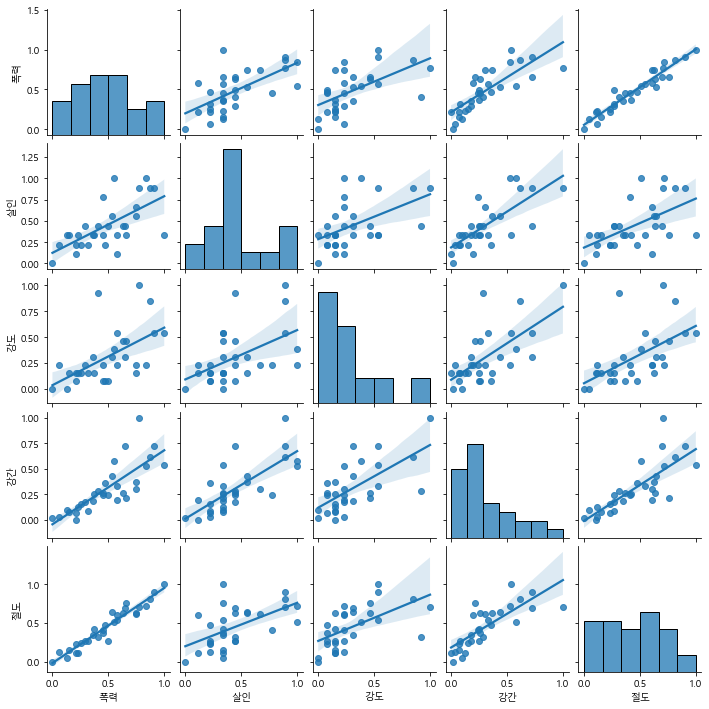

In [14]:
sns.pairplot(crime_anal_norm2, vars=["폭력", "살인", "강도", "강간", "절도"], height=2, kind="reg")

#### 인구수와 CCTV수가 살인, 강간 건수와 상관이 있는지

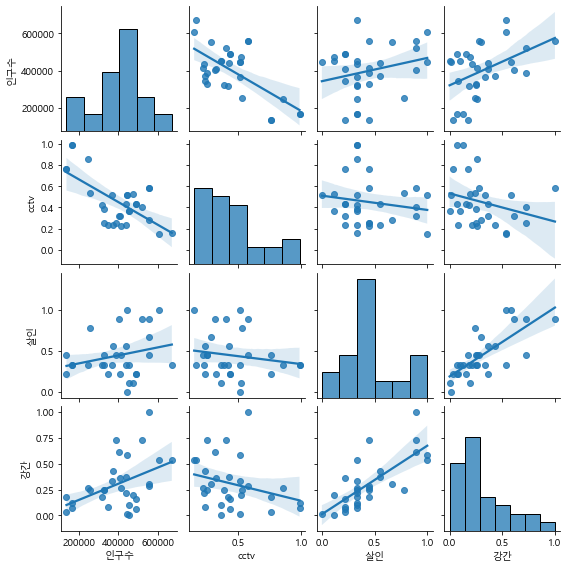

In [26]:
sns.pairplot(crime_anal_norm2, vars=["인구수","cctv","살인","강간"], height=2, kind="reg")

#### 인구수와 CCTV수가 살인, 강간 검거율과 상관이 있는지

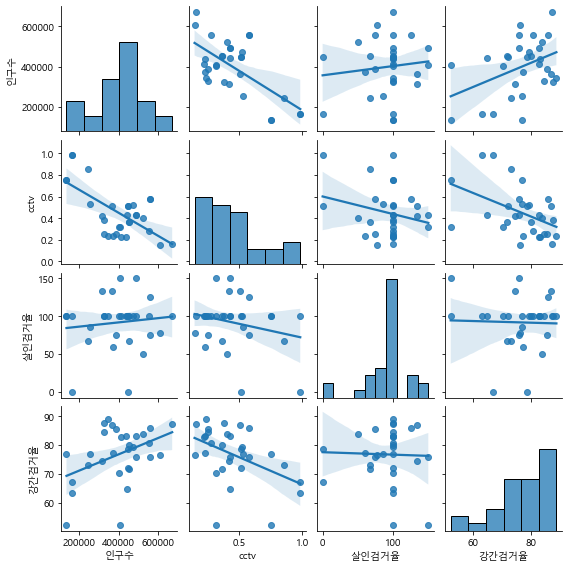

In [15]:
sns.pairplot(crime_anal_norm2, vars=["인구수","cctv","살인검거율","강간검거율"],
            height=2, kind="reg")